In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Logistic Regression:

1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model



In [16]:
# 1.

glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

y_prob = logreg.predict_proba(X)[:, 1]

for threshold in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8]:
    y_pred_custom = (y_prob >= threshold).astype(int)
    acc = accuracy_score(y, y_pred_custom)
    prec = precision_score(y, y_pred_custom)
    rec = recall_score(y, y_pred_custom)
    print(f"Threshold: {threshold} | Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f}")



Threshold: 0.2 | Accuracy: 0.77 | Precision: 0.51 | Recall: 0.86
Threshold: 0.3 | Accuracy: 0.86 | Precision: 0.72 | Recall: 0.71
Threshold: 0.4 | Accuracy: 0.88 | Precision: 0.82 | Recall: 0.63
Threshold: 0.5 | Accuracy: 0.87 | Precision: 0.90 | Recall: 0.51
Threshold: 0.6 | Accuracy: 0.84 | Precision: 0.87 | Recall: 0.39
Threshold: 0.7 | Accuracy: 0.84 | Precision: 1.00 | Recall: 0.31
Threshold: 0.8 | Accuracy: 0.82 | Precision: 1.00 | Recall: 0.24


As threshold increases, precision keeps increasing while recall keeps decreasing. Accuracy increases at first then decreases.


In [11]:
# 2.

features = ['RI', 'Na', 'Mg', 'Si', 'K', 'Ca', 'Ba', 'Fe']
thresholds = [0.2, 0.3, 0.5, 0.7, 0.9]

for feature in features:
    X = np.array(glass[feature]).reshape(-1, 1)
    y = glass['household']

    logreg = LogisticRegression()
    logreg.fit(X, y)
    y_prob = logreg.predict_proba(X)[:, 1]

    print(f"\nFeature: {feature}")
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred)
        rec = recall_score(y, y_pred)
        print(f"  Threshold: {threshold:.1f} | Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f}")



Feature: RI
  Threshold: 0.2 | Accuracy: 0.24 | Precision: 0.24 | Recall: 1.00
  Threshold: 0.3 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.5 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.7 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.9 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00

Feature: Na
  Threshold: 0.2 | Accuracy: 0.71 | Precision: 0.44 | Recall: 0.73
  Threshold: 0.3 | Accuracy: 0.83 | Precision: 0.62 | Recall: 0.69


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

  Threshold: 0.5 | Accuracy: 0.86 | Precision: 0.86 | Recall: 0.47
  Threshold: 0.7 | Accuracy: 0.80 | Precision: 1.00 | Recall: 0.18
  Threshold: 0.9 | Accuracy: 0.77 | Precision: 1.00 | Recall: 0.04

Feature: Mg
  Threshold: 0.2 | Accuracy: 0.91 | Precision: 0.78 | Recall: 0.88
  Threshold: 0.3 | Accuracy: 0.91 | Precision: 0.79 | Recall: 0.82
  Threshold: 0.5 | Accuracy: 0.88 | Precision: 0.78 | Recall: 0.69
  Threshold: 0.7 | Accuracy: 0.88 | Precision: 0.79 | Recall: 0.67
  Threshold: 0.9 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Feature: Si
  Threshold: 0.2 | Accuracy: 0.40 | Precision: 0.26 | Recall: 0.84
  Threshold: 0.3 | Accuracy: 0.80 | Precision: 0.74 | Recall: 0.27
  Threshold: 0.5 | Accuracy: 0.77 | Precision: 1.00 | Recall: 0.04
  Threshold: 0.7 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.9 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00

Feature: K
  Threshold: 0.2 | Accuracy: 0.24 | Precision: 0.24 | Recall: 1.00
  Threshold: 0.3 | Accuracy: 0.78 | Precision: 1.00 | Recall: 0.06
  Threshold: 0.5 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.7 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.9 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p


Feature: Ca
  Threshold: 0.2 | Accuracy: 0.23 | Precision: 0.23 | Recall: 0.98
  Threshold: 0.3 | Accuracy: 0.74 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.5 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.7 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.9 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Feature: Ba
  Threshold: 0.2 | Accuracy: 0.86 | Precision: 0.80 | Recall: 0.55
  Threshold: 0.3 | Accuracy: 0.88 | Precision: 0.93 | Recall: 0.53
  Threshold: 0.5 | Accuracy: 0.84 | Precision: 0.90 | Recall: 0.35
  Threshold: 0.7 | Accuracy: 0.83 | Precision: 0.94 | Recall: 0.29
  Threshold: 0.9 | Accuracy: 0.81 | Precision: 0.92 | Recall: 0.24

Feature: Fe
  Threshold: 0.2 | Accuracy: 0.31 | Precision: 0.25 | Recall: 0.96
  Threshold: 0.3 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.5 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.7 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00
  Threshold: 0.9 | Accuracy: 0.76 | Precision: 0.00 | Recall: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In general, as threshold increases, precision keeps increasing while recall keeps decreasing. Accuracy increases at first then decreases.


In [17]:
# 3.

features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = glass[features]
y = glass.household

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#  Predict
y_prob = logreg.predict_proba(X_test)[:, 1]

thresholds = [0.2, 0.3, 0.5, 0.7, 0.9]
print("Performance on Test Set:")
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f"Threshold: {threshold:.1f} | Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f}")


Performance on Test Set:
Threshold: 0.2 | Accuracy: 0.93 | Precision: 0.88 | Recall: 0.94
Threshold: 0.3 | Accuracy: 0.93 | Precision: 0.93 | Recall: 0.88
Threshold: 0.5 | Accuracy: 0.88 | Precision: 0.92 | Recall: 0.75
Threshold: 0.7 | Accuracy: 0.86 | Precision: 0.92 | Recall: 0.69
Threshold: 0.9 | Accuracy: 0.81 | Precision: 0.90 | Recall: 0.56


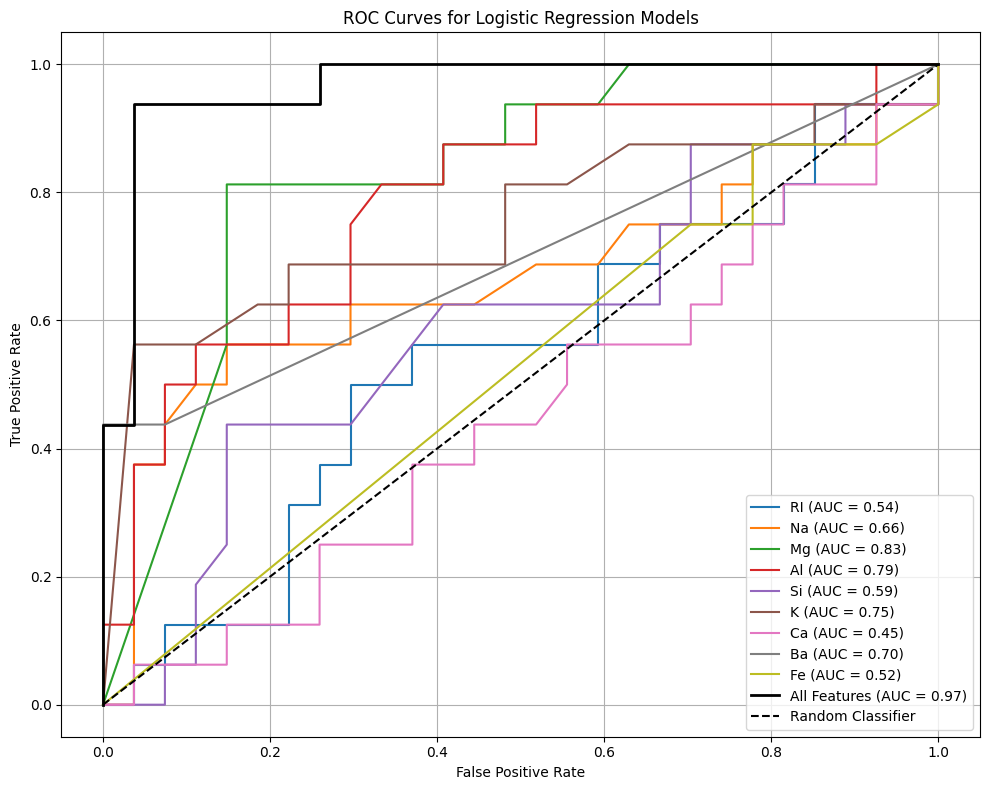

In [21]:
# 4.

scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scaled, y, test_size=0.2, random_state=42)

logreg_all = LogisticRegression()
logreg_all.fit(X_train_all, y_train_all)
y_prob_all = logreg_all.predict_proba(X_test_all)[:, 1]
fpr_all, tpr_all, _ = roc_curve(y_test_all, y_prob_all)
auc_all = roc_auc_score(y_test_all, y_prob_all)

plt.figure(figsize=(10, 8))

# Plot ROC for each individual feature
for feature in features:
    X = glass[[feature]]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{feature} (AUC = {auc:.2f})")

# Plot ROC for all-feature model
plt.plot(fpr_all, tpr_all, label=f"All Features (AUC = {auc_all:.2f})", color='black', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
%matplotlib inline

from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import seaborn as sns
plt.style.use('fivethirtyeight')

df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Clustering:

1. Repeat the above exercise for different values of k

- How do the inertia and silhouette scores change?

- What if you don't scale your features?

- Is there a 'right' k? Why or why not?

2. Repeat the following exercise for food nutrients dataset

Text(0, 0.5, 'Score')

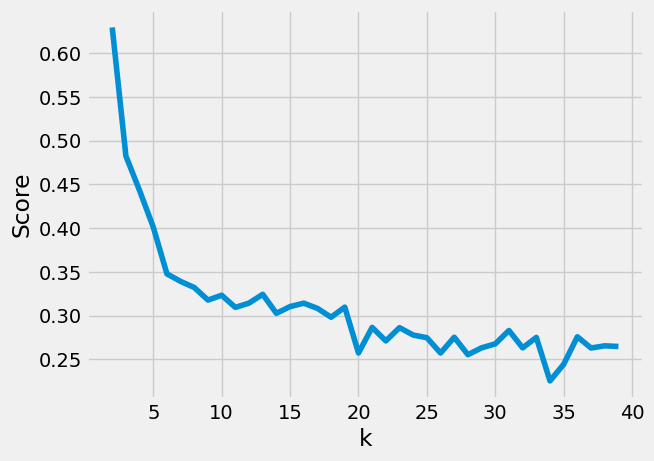

In [30]:
cols = df.columns[:-1]

X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

score=[]
for k in range(2,40):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

plt.plot(list(range(2,40)),score)
plt.xlabel('k')
plt.ylabel('Score')


The silhouette scores decreases largely at first, then it start fluctuate.

Text(0, 0.5, 'Inertia')

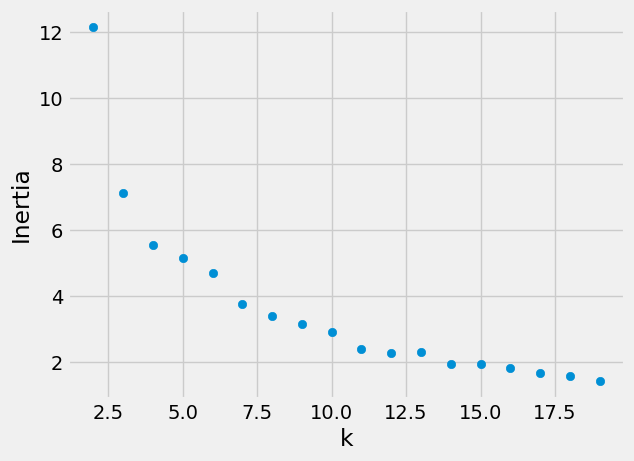

In [31]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

plt.scatter(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

 The inertia keeps decresing when k increases. But, it deceases in a large amount at first and then tend to decrease slower.

Without scaling, features with large amount will dominate and thus affect the reliebility of inertia and silhouette scores.

There's no specific true k, but there can be a good range. Within the range, it's kind of a trade-off between accuracy and interpretability.

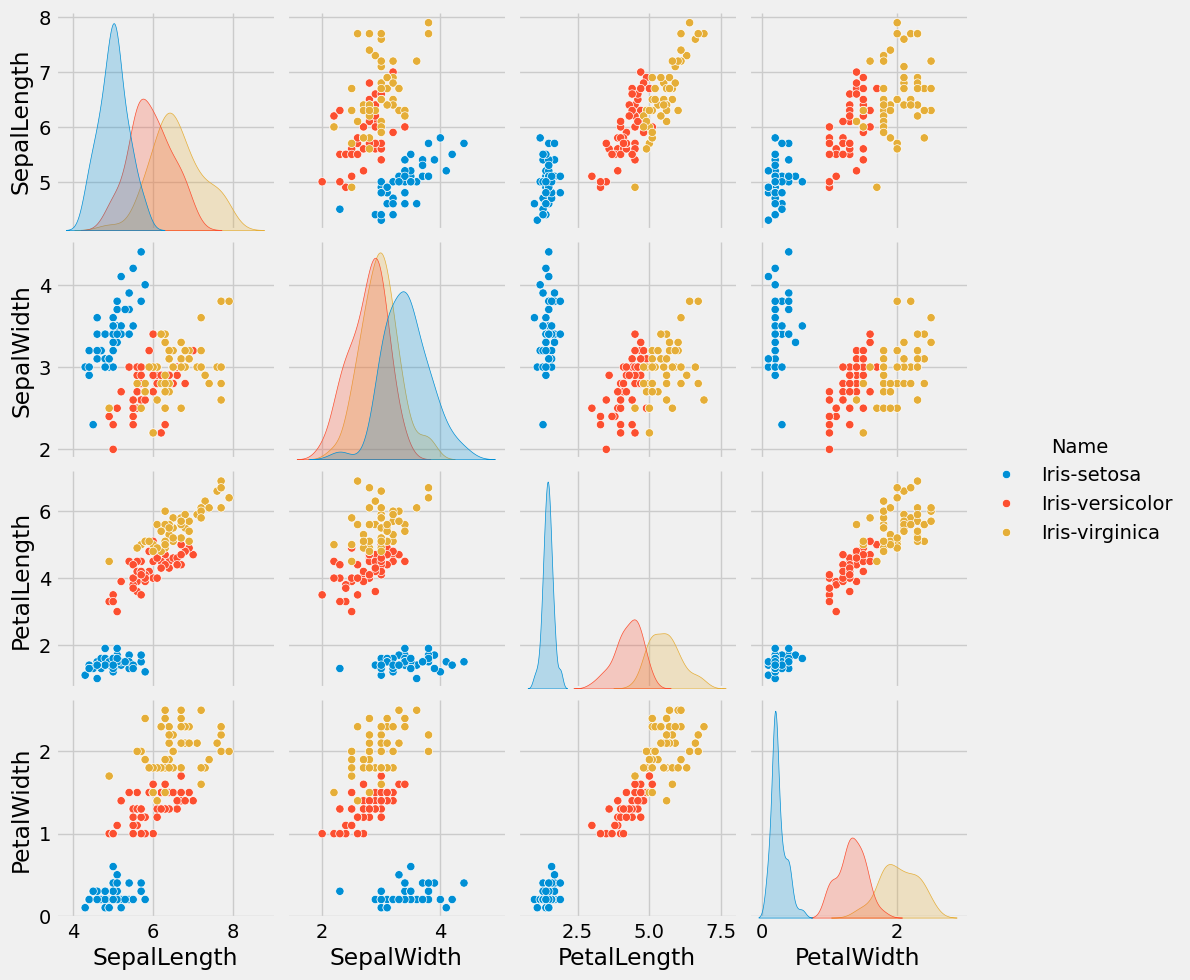

In [34]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')
